In [21]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from category_encoders import BinaryEncoder, CountEncoder, OrdinalEncoder

In [4]:
base = './stream_quality_data_class/'

In [5]:
df = pd.read_csv(base + 'train_data.csv')

In [11]:
pd.read_csv(base + 'test_data.csv').shape

(243596, 12)

In [6]:
def _check_nans(df):
    """returns num of empty items in a dataframe"""
    return df.isna().sum().sum()

In [7]:
df

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,off,partial,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,off,partial,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,off,partial,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,off,partial,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,off,partial,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
406567,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0
406568,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0
406569,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0
406570,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,full,partial,50.0,0


In [8]:
len(df.columns)

12

In [57]:
"Total no of empty cells in dataframe: %d" % _check_nans(df)

'Total no of empty cells in dataframe: 0'

In [10]:
df.shape

(406572, 12)

### Preprocess

In [9]:
print("Total duplicates in the dataset: %d" % df.duplicated().sum())

Total duplicates in the dataset: 33430


In [59]:
df = df.drop_duplicates().reset_index(drop=True)  # dropping duplicates

In [60]:
df.dtypes

fps_mean               float64
fps_std                float64
fps_lags                 int64
rtt_mean               float64
rtt_std                float64
dropped_frames_mean    float64
dropped_frames_std     float64
dropped_frames_max     float64
auto_bitrate_state      object
auto_fec_state          object
auto_fec_mean          float64
stream_quality           int64
dtype: object

In [65]:
cat_cols = []

for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col} has NA: ", pd.isna(df[col].sum()))
        cat_cols.append(col)
    elif df[col].dtype == np.int64:
        print(f"{col} has NA: ", (df[col] == 0).sum())
    else:
        print(f"{col} has NA: ", (df[col] == 0.0).sum())
        

fps_mean has NA:  4131
fps_std has NA:  97096
fps_lags has NA:  379021
rtt_mean has NA:  9597
rtt_std has NA:  19986
dropped_frames_mean has NA:  375215
dropped_frames_std has NA:  377427
dropped_frames_max has NA:  375215
auto_bitrate_state has NA:  False
auto_fec_state has NA:  False
auto_fec_mean has NA:  47276
stream_quality has NA:  378738


In [66]:
print("Categorical Columns: ", cat_cols)

Categorical Columns:  ['auto_bitrate_state', 'auto_fec_state']


In [67]:
def encode_data(df, cat_cols, oe=None):
    if not oe:
        oe = OrdinalEncoder(cols = cat_cols).fit(df)
    df_enc = oe.transform(df)
    return oe, df_enc 

In [68]:
encoder, df = encode_data(df, cat_cols)
df

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,1,1,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,1,1,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,1,1,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,1,1,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,1,1,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
406567,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0,0
406568,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0,0
406569,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0,0
406570,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0,0


In [206]:
 df['auto_fec_state'].unique(), df['auto_bitrate_state'].unique(), 

(array([1, 2]), array([1, 2, 3]))

In [207]:
df['auto_bitrate_state'].value_counts()

1    299958
2     72774
3       410
Name: auto_bitrate_state, dtype: int64

In [208]:
df['auto_fec_state'].value_counts()

1    330578
2     42564
Name: auto_fec_state, dtype: int64

In [209]:
df['auto_fec_state'].value_counts()

1    330578
2     42564
Name: auto_fec_state, dtype: int64

In [210]:
(pd.Series(['1', np.nan, '3', '4', np.nan, 0, 0]) == 0)

0    False
1    False
2    False
3    False
4    False
5     True
6     True
dtype: bool

### EDA

In [212]:
"Total no. of columns: %d" % len(df.columns.tolist())

'Total no. of columns: 12'

In [23]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [24]:
profile.to_file(base + "eda_classification.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/media/symlink_part/.virtualenvs/ml_assg1/lib/python3.8/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [213]:
df.describe()

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
count,373142.000000,373142.000000,373142.000000,373142.000000,373142.000000,3.731420e+05,3.731420e+05,3.731420e+05,373142.000000,373142.000000,373142.000000,373142.000000
mean,35.069812,2.489203,0.097370,57.281921,21.229666,3.462350e+05,1.491617e+05,5.222737e+05,1.197228,1.114069,51.952779,0.063927
std,11.392012,3.805238,0.567563,135.688714,163.110117,2.030192e+07,9.614595e+06,2.749080e+07,0.400658,0.317896,35.506799,0.244624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000,0.000000
25%,28.200000,0.421637,0.000000,16.000000,0.788811,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,50.000000,0.000000
50%,30.000000,1.229273,0.000000,34.000000,1.712698,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,50.000000,0.000000
75%,44.100000,2.836273,0.000000,59.200000,6.196773,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,50.000000,0.000000
max,127.100000,312.540842,10.000000,12898.400000,40721.933293,2.097289e+09,9.963751e+08,2.097289e+09,3.000000,2.000000,250.000000,1.000000


In [214]:
# profile.to_notebook_iframe()

In [215]:
# !xdg-open .*/-0

### Selecting subset of data based on pandas_profiling Report

In [216]:
# dropped_frames_mean/std/max
# rtt_mean/std     (rtt_mean is better as it has less missing vals )   5 cols
# fps_mean/std     (fps_mean is better as it has less missing vals)
# fps_lags   (corr with dropped_frames_mean/std/max)   [Ignore - too many missing vals]
# auto_fec_state (corr with auto_fec_mean)  [Wold prefer `auto_fec_state`]
# auto_bitrate_state  (no corr with anything - Good to use)

# stream_quality  (target variable)

In [14]:
selected_cols = ['dropped_frames_mean', 'rtt_mean', 'fps_mean', 'auto_fec_state', 'auto_bitrate_state', 'stream_quality']

In [17]:
print(', '.join(list(map(lambda x: x.replace('_', '\_'), selected_cols))))

dropped\_frames\_mean, rtt\_mean, fps\_mean, auto\_fec\_state, auto\_bitrate\_state, stream\_quality


In [218]:
len(selected_cols)

6

In [219]:
df

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.000000,0.0,1,1,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.000000,0.0,1,1,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.000000,0.0,1,1,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.000000,0.0,1,1,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.000000,0.0,1,1,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
373137,48.3,12.302213,0,119.3,0.674949,8.5,26.879360,85.0,2,1,50.0,0
373138,48.7,8.957306,0,119.8,0.788811,6.8,21.503488,68.0,2,1,50.0,0
373139,54.2,7.099296,0,119.4,0.516398,0.0,0.000000,0.0,2,1,50.0,0
373140,49.5,7.575545,0,120.0,0.816497,0.0,0.000000,0.0,2,1,50.0,0


In [69]:
df_selected = df[selected_cols]
df_selected

,dropped_frames_mean,rtt_mean,fps_mean,auto_fec_state,auto_bitrate_state,stream_quality
0,0.0,91.1,24.4,1,1,0
1,0.0,99.7,28.6,1,1,0
2,0.0,98.1,30.0,1,1,0
3,0.0,99.4,30.3,1,1,0
4,0.0,123.2,29.9,1,1,0
...,...,...,...,...,...,...
406567,0.0,0.0,40.0,1,2,0
406568,0.0,0.0,40.0,1,2,0
406569,0.0,0.0,40.0,1,2,0
406570,0.0,0.0,40.0,1,2,0


### Plot to see imbalance

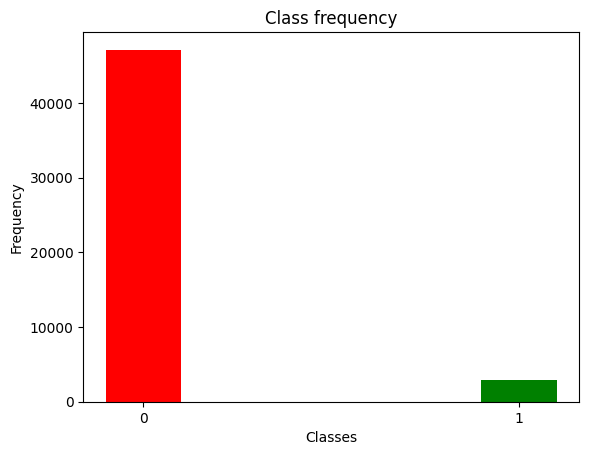

In [51]:
%matplotlib inline

top_5_stream = df_selected['stream_quality'][:50000].values

#  Create bars with different colors
plt.bar(['0', '1'],  df_selected['stream_quality'][:50000].value_counts(), width=.2, color=['red', 'green'])

# Create names on the x-axis
plt.ylabel('Frequency')
plt.xlabel('Classes')
plt.title('Class frequency')
# Show graph
plt.show()

### Impute Dataset

In [52]:
# from sklearn.impute import SimpleImputer
# import numpy as np

# #TODO: Complete a function that returns number of empty cells 
# def count_nans(df):
#     # 1 or 2 lines.
#     return np.sum(np.sum(np.isnan(df))) #np.count_nonzero(~np.isnan(df))

# # Print number of empty cells (1 line)
# print("#Empty missing data cells in the dataset = ", count_nans(df_selected))


In [53]:
# # Write your code here (4 lines):
# # create the imputer object.
# # fit the imputer.
# imputer = SimpleImputer(strategy='most_frequent')
# imputer.fit(encoded_data)
# imputed_data = imputer.transform(encoded_data)

# print("After Imputing:")
# # Print number of empty cells in the data(1 line)
# print("#Empty cells in dataset =", count_nans(imputed_data))

### Scale Data

In [70]:
df_selected

,dropped_frames_mean,rtt_mean,fps_mean,auto_fec_state,auto_bitrate_state,stream_quality
0,0.0,91.1,24.4,1,1,0
1,0.0,99.7,28.6,1,1,0
2,0.0,98.1,30.0,1,1,0
3,0.0,99.4,30.3,1,1,0
4,0.0,123.2,29.9,1,1,0
...,...,...,...,...,...,...
406567,0.0,0.0,40.0,1,2,0
406568,0.0,0.0,40.0,1,2,0
406569,0.0,0.0,40.0,1,2,0
406570,0.0,0.0,40.0,1,2,0


In [73]:
df

,fps_mean,fps_std,fps_lags,rtt_mean,rtt_std,dropped_frames_mean,dropped_frames_std,dropped_frames_max,auto_bitrate_state,auto_fec_state,auto_fec_mean,stream_quality
0,24.4,0.516398,0,91.1,6.723921,0.0,0.0,0.0,1,1,50.0,0
1,28.6,2.065591,0,99.7,15.923777,0.0,0.0,0.0,1,1,50.0,0
2,30.0,0.000000,0,98.1,11.798776,0.0,0.0,0.0,1,1,50.0,0
3,30.3,0.948683,0,99.4,13.014522,0.0,0.0,0.0,1,1,50.0,0
4,29.9,0.316228,0,123.2,62.476307,0.0,0.0,0.0,1,1,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
406567,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0,0
406568,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0,0
406569,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0,0
406570,40.0,0.000000,0,0.0,0.000000,0.0,0.0,0.0,2,1,50.0,0


In [71]:
from sklearn.preprocessing import RobustScaler, StandardScaler

def scale_data(df_selected, scaler = None, y_col = 'stream_quality'):
    
    if not scaler:
        scaler = StandardScaler()
    df_selected_without_y = df_selected.drop(y_col, axis=1)
    scaler.fit(df_selected_without_y)
    data_scaled = scaler.transform(df_selected_without_y)
    df_scaled = pd.DataFrame(data_scaled, columns = df_selected_without_y.columns)
    df_scaled[y_col] = df_selected[y_col]
    return scaler, df_scaled

In [72]:
scaler, df_scaled = scale_data(df_selected)
df_scaled

,dropped_frames_mean,rtt_mean,fps_mean,auto_fec_state,auto_bitrate_state,stream_quality
0,-0.035099,0.274782,-0.868572,-0.362739,-0.479378,0
1,-0.035099,0.339023,-0.507296,-0.362739,-0.479378,0
2,-0.035099,0.327071,-0.386871,-0.362739,-0.479378,0
3,-0.035099,0.336782,-0.361066,-0.362739,-0.479378,0
4,-0.035099,0.514564,-0.395473,-0.362739,-0.479378,0
...,...,...,...,...,...,...
406567,-0.035099,-0.405719,0.473309,-0.362739,2.058931,0
406568,-0.035099,-0.405719,0.473309,-0.362739,2.058931,0
406569,-0.035099,-0.405719,0.473309,-0.362739,2.058931,0
406570,-0.035099,-0.405719,0.473309,-0.362739,2.058931,0


In [74]:
df_selected

,dropped_frames_mean,rtt_mean,fps_mean,auto_fec_state,auto_bitrate_state,stream_quality
0,0.0,91.1,24.4,1,1,0
1,0.0,99.7,28.6,1,1,0
2,0.0,98.1,30.0,1,1,0
3,0.0,99.4,30.3,1,1,0
4,0.0,123.2,29.9,1,1,0
...,...,...,...,...,...,...
406567,0.0,0.0,40.0,1,2,0
406568,0.0,0.0,40.0,1,2,0
406569,0.0,0.0,40.0,1,2,0
406570,0.0,0.0,40.0,1,2,0


### Split Data

In [75]:
from sklearn.model_selection import train_test_split

def split_data(data, target = 'stream_quality', test_sz = 0.2):
    df_train, df_val, = train_test_split(data, test_size=test_sz, stratify = df_scaled[target], random_state=0)
    print(df_train.shape, df_val.shape)
    return df_train, df_val

In [76]:
df_train, df_val = split_data(df_scaled)

(325257, 6) (81315, 6)


### Logistic Regression for Binary Classification

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lr_clf = LogisticRegression()
lr_clf.fit(df_train.drop('stream_quality', axis=1), df_train['stream_quality'])

LogisticRegression()

### Compute and Plot Cross-Val loss

In [138]:
from sklearn.model_selection import validation_curve


def get_cross_val_curve(classifier, X, y, **params):
    train_scores, valid_scores = validation_curve(
        classifier, X, y, **params)
    
    return train_scores, valid_scores


In [139]:
def plot_scores(train_scores, valid_scores, clf):
    # valid_scores
    plt.plot(train_scores, label=f'Training {clf}')
    plt.plot(valid_scores, label=f'Validation {clf}')

    plt.legend()
    plt.show()

In [155]:
X_, y_ = df_train.drop('stream_quality', axis=1), df_train['stream_quality']
params = {'param_name':"penalty", 'cv' : 10, 'param_range' : ['l2']}
tr_lr, val_lr = get_cross_val_curve(LogisticRegression(), X_, y_, **params)

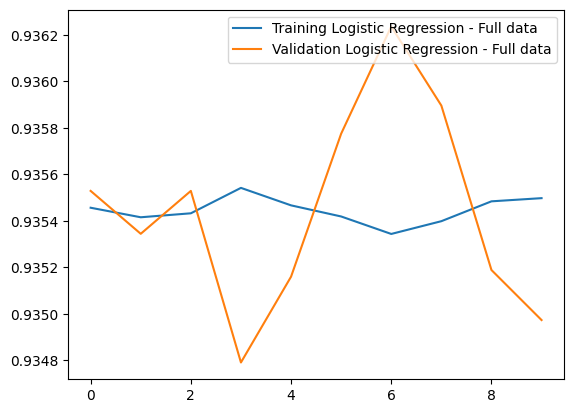

In [158]:
plot_scores(tr_lr.flatten(), val_lr.flatten(), 'Logistic Regression - Full data')

In [148]:

tr, val = get_cross_val_curve(LogisticRegression(), X_down, y_down, **params)
tr.shape, val.shape

((1, 10), (1, 10))

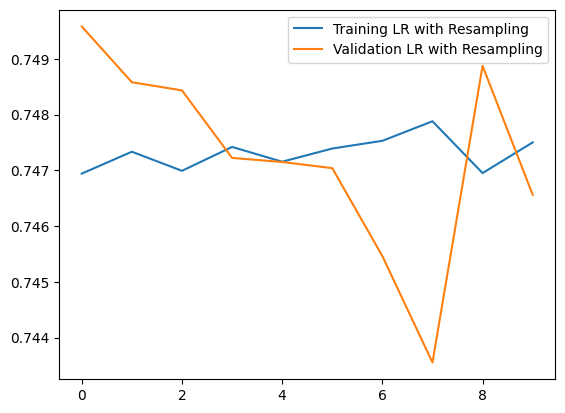

In [153]:
plot_scores(tr.flatten(), val.flatten(), 'LR with Resampling')

In [128]:
lr_clf.score(df_val.drop('stream_quality', axis=1), df_val['stream_quality'])

0.9353255856852979

### Evaluate Model on eval data

In [164]:
class_wise_scores = {}

In [80]:
from sklearn.metrics import classification_report

def print_class_report(y_pred, y_true):
    print()
    print("Classification Report:")
    target_names = [ 'Stream 0', 'Stream 1',]
    print(classification_report(y_true, y_pred, target_names=target_names))

In [81]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

def print_eval_metrics(y_pred, y_true):
    p, r, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)
    print("Accuracy: ", round(acc, 2))
    print("Precision: ", round(p, 2))
    print("Recall: ", round(r, 2))
    print("F1_score: ", round(f1, 2))
    print_class_report(y_pred, y_true)

In [82]:
y_true = df_val['stream_quality']
y_pred = lr_clf.predict(df_val.drop('stream_quality', axis=1))

print_eval_metrics(y_pred, y_true)

Accuracy:  0.94
Precision:  0.91
Recall:  0.53
F1_score:  0.54

Classification Report:
              precision    recall  f1-score   support

    Stream 0       0.94      1.00      0.97     75748
    Stream 1       0.89      0.06      0.12      5567

    accuracy                           0.94     81315
   macro avg       0.91      0.53      0.54     81315
weighted avg       0.93      0.94      0.91     81315



In [83]:
!ls $base

eda_classification.html  readme.txt  test_data.csv  train_data.csv


### Evaluate model on test data

In [168]:
df_test = pd.read_csv(base + 'test_data.csv')

In [169]:
"No of NaNs in the dataset %d" % _check_nans(df_test) # Check for nans

'No of NaNs in the dataset 0'

In [170]:
_, df_test_enc = encode_data(df_test, cat_cols, oe=encoder)
df_test_enc = df_test_enc[selected_cols]

In [171]:
_, df_test_scaled = scale_data(df_test_enc, scaler=scaler)

In [172]:
pred = lr_clf.predict(df_test_scaled.drop('stream_quality', axis=1))

In [173]:
print_eval_metrics(pred, df_test_scaled['stream_quality'])

Accuracy:  0.94
Precision:  0.88
Recall:  0.52
F1_score:  0.52

Classification Report:
              precision    recall  f1-score   support

    Stream 0       0.94      1.00      0.97    227902
    Stream 1       0.83      0.04      0.08     15694

    accuracy                           0.94    243596
   macro avg       0.88      0.52      0.52    243596
weighted avg       0.93      0.94      0.91    243596



In [174]:
class_wise_scores['lr'] = classification_report(df_test_scaled['stream_quality'], pred, target_names=['0', '1'], output_dict=True)

## Resampling and Retraining of Logistic Regression

In [278]:
df_train

,dropped_frames_mean,rtt_mean,fps_mean,auto_fec_state,auto_bitrate_state,stream_quality
245746,-0.017054,-0.279183,0.538114,2.786864,2.003636,0
57666,-0.017054,-0.397100,-0.901494,-0.358826,-0.492260,0
340753,-0.017054,0.505703,-0.515258,-0.358826,-0.492260,0
165958,-0.017054,0.092256,-0.445033,-0.358826,-0.492260,0
76402,-0.017054,0.277975,-0.453811,-0.358826,-0.492260,0
...,...,...,...,...,...,...
197933,-0.017054,-0.325613,-0.453811,-0.358826,-0.492260,0
273870,-0.017054,-0.386045,-1.006831,-0.358826,-0.492260,0
118006,-0.017054,-0.385308,0.459111,-0.358826,2.003636,0
291983,-0.017054,-0.259284,-0.576704,-0.358826,2.003636,0


In [84]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

TARGET = 'stream_quality'

oversample = RandomOverSampler(sampling_strategy=0.3)
X_over, y_over = oversample.fit_resample(df_train.drop(TARGET, axis=1), df_train[TARGET])

In [85]:
y_over.value_counts()

0    302990
1     90897
Name: stream_quality, dtype: int64

In [86]:
df_train[TARGET].value_counts()

0    302990
1     22267
Name: stream_quality, dtype: int64

In [87]:
downsample = RandomUnderSampler(sampling_strategy=0.5)
X_down, y_down = downsample.fit_resample(X_over, y_over)

In [88]:
y_down.value_counts()

0    181794
1     90897
Name: stream_quality, dtype: int64

In [89]:
X_down

,dropped_frames_mean,rtt_mean,fps_mean,auto_fec_state,auto_bitrate_state
0,-0.035099,-0.159215,1.763578,-0.362739,-0.479378
1,-0.035099,-0.333262,-0.455685,-0.362739,-0.479378
2,-0.035099,43.584096,-0.352464,2.756804,2.058931
3,-0.035099,-0.045674,-0.395473,-0.362739,-0.479378
4,-0.035099,-0.339985,-0.481491,-0.362739,-0.479378
...,...,...,...,...,...
272686,-0.035099,-0.289190,1.247470,-0.362739,-0.479378
272687,-0.035099,2.624043,1.978623,-0.362739,-0.479378
272688,-0.035099,-0.304130,-0.447084,-0.362739,-0.479378
272689,-0.035099,1.070319,-1.961000,-0.362739,2.058931


In [146]:
lr_clf_sampl = LogisticRegression()
lr_clf_sampl.fit(X_down, y_down)

LogisticRegression()

In [147]:
pred_ds = lr_clf_sampl.predict(df_test_scaled.drop('stream_quality', axis=1))

print_eval_metrics(pred_ds, df_test_scaled['stream_quality'])

Accuracy:  0.79
Precision:  0.54
Recall:  0.61
F1_score:  0.54

Classification Report:
              precision    recall  f1-score   support

    Stream 0       0.95      0.81      0.88    227902
    Stream 1       0.13      0.41      0.20     15694

    accuracy                           0.79    243596
   macro avg       0.54      0.61      0.54    243596
weighted avg       0.90      0.79      0.83    243596



In [176]:
class_wise_scores['lr_resample'] = classification_report(df_test_scaled['stream_quality'], pred_ds, target_names=['0', '1'], output_dict=True)

### SVC Model

In [92]:

from sklearn.svm import SVC
svm = SVC(gamma='auto')
svm.fit(X_down, y_down)

SVC(gamma='auto')

In [100]:
pred_svm = svm.predict(df_test_scaled.drop(TARGET, axis=1))
pred_svm
print_eval_metrics(pred_svm, df_test_scaled['stream_quality'])

Accuracy:  0.93
Precision:  0.66
Recall:  0.58
F1_score:  0.6

Classification Report:
              precision    recall  f1-score   support

    Stream 0       0.95      0.98      0.96    227902
    Stream 1       0.38      0.18      0.24     15694

    accuracy                           0.93    243596
   macro avg       0.66      0.58      0.60    243596
weighted avg       0.91      0.93      0.92    243596



In [177]:
class_wise_scores['svc_resample'] = classification_report(df_test_scaled['stream_quality'], pred_svm, target_names=['0', '1'], output_dict=True)

### Plotting class-wise scores

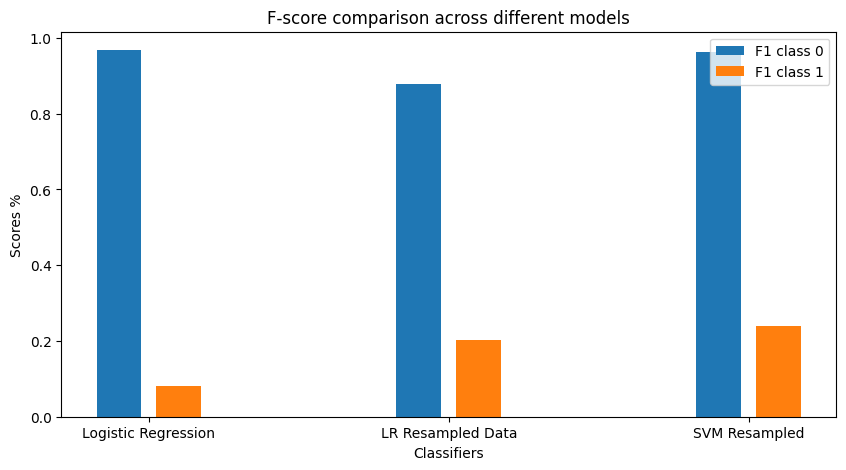

In [207]:

import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Logistic Regression','LR Resampled Data','SVM Resampled']
plt.figure(figsize=(10,5))

lr_prec = [class_wise_scores['lr']['0']['f1-score'], class_wise_scores['lr_resample']['0']['f1-score'], class_wise_scores['svc_resample']['0']['f1-score']]
lr_recall = [class_wise_scores['lr']['1']['f1-score'], class_wise_scores['lr_resample']['1']['f1-score'], class_wise_scores['svc_resample']['1']['f1-score']]

X_axis = np.arange(len(X))

bar_width = 0.15 
plt.bar(X_axis - 0.1, lr_prec, bar_width, label = 'F1 class 0')
plt.bar(X_axis + 0.1, lr_recall, bar_width, label = 'F1 class 1')
  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")
plt.ylabel("Scores %")
plt.title("F-score comparison across different models")
plt.legend()
plt.show()